<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

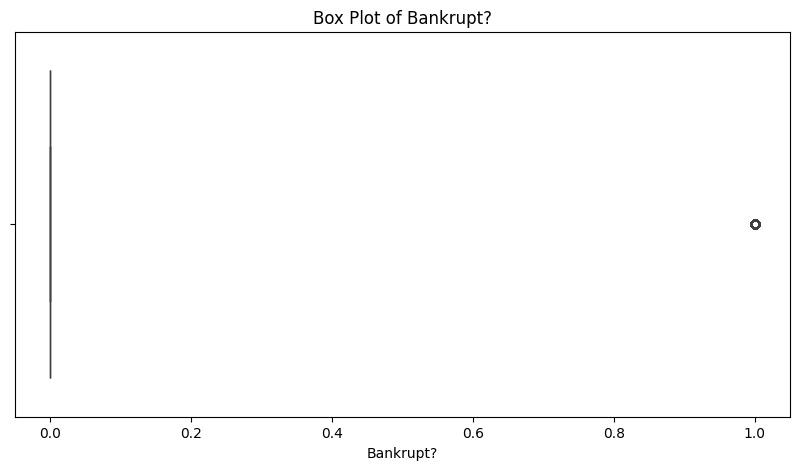

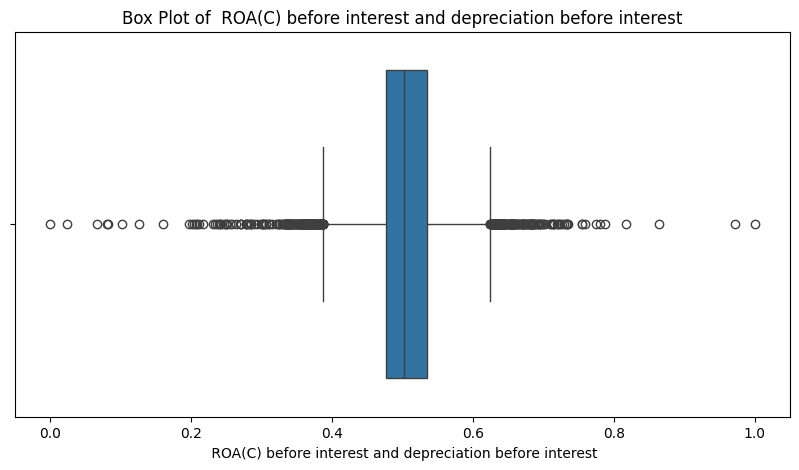

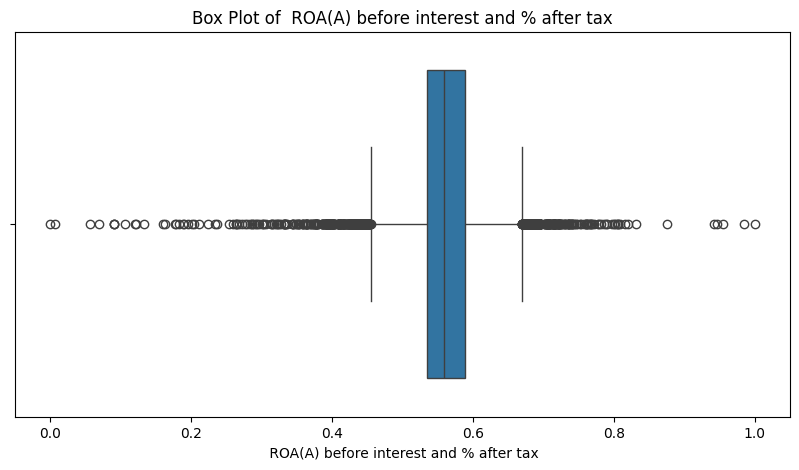

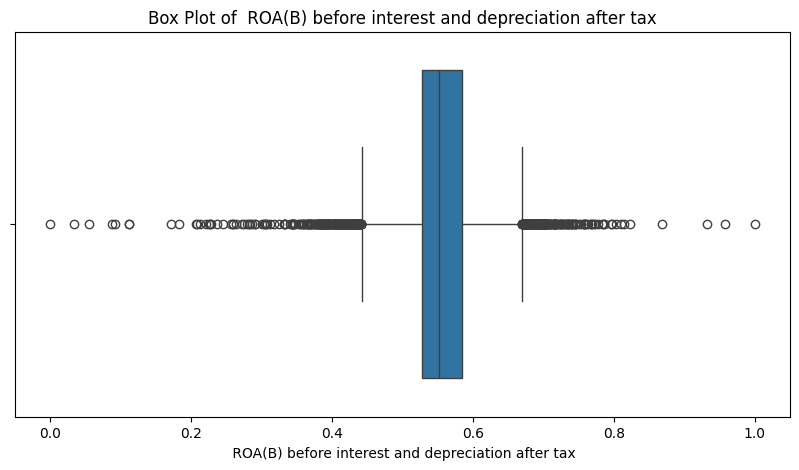

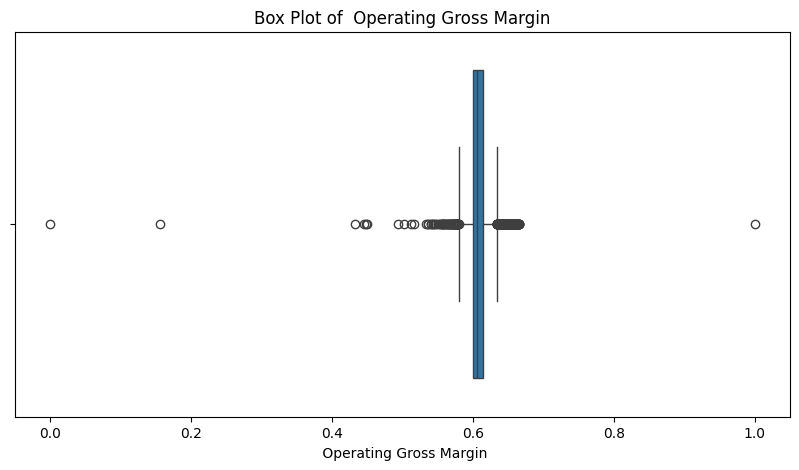

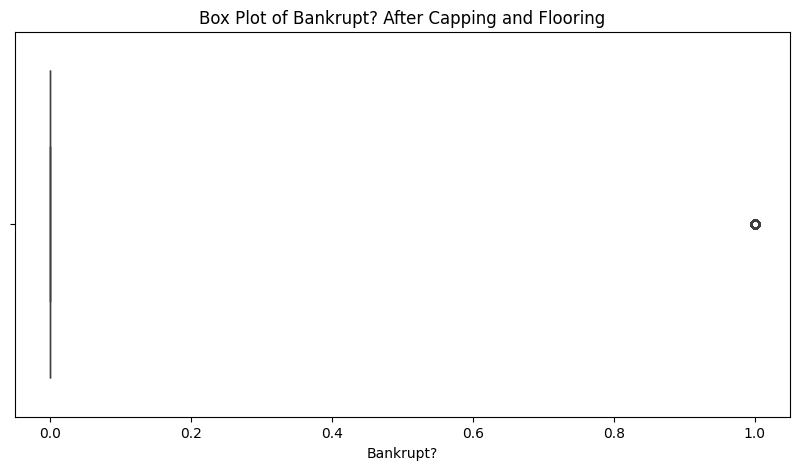

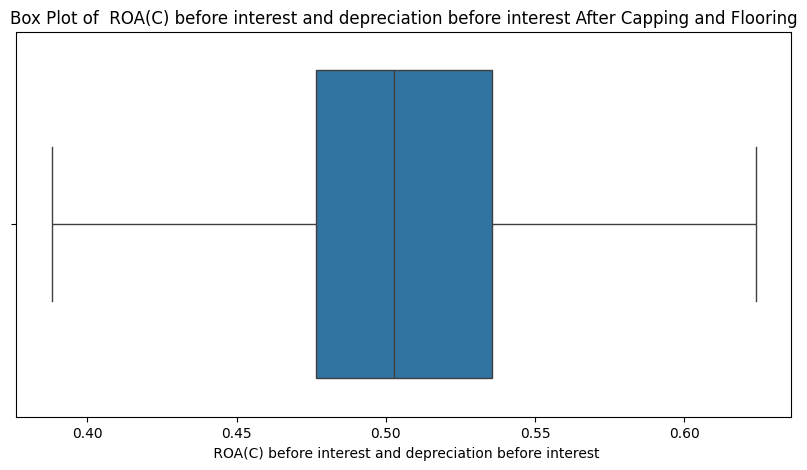

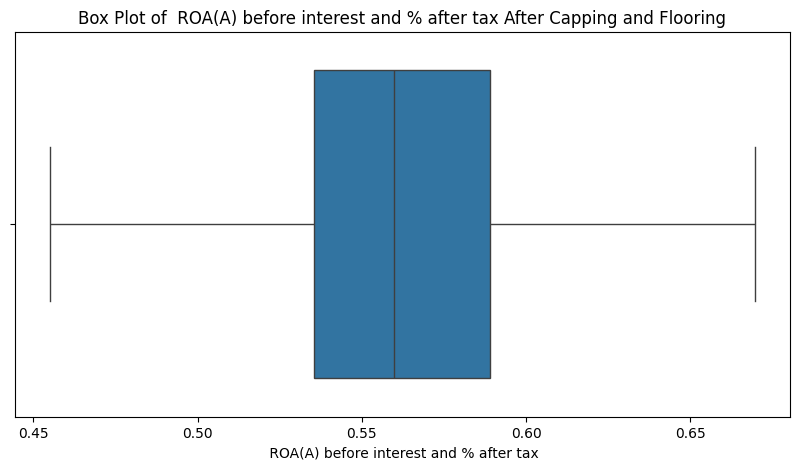

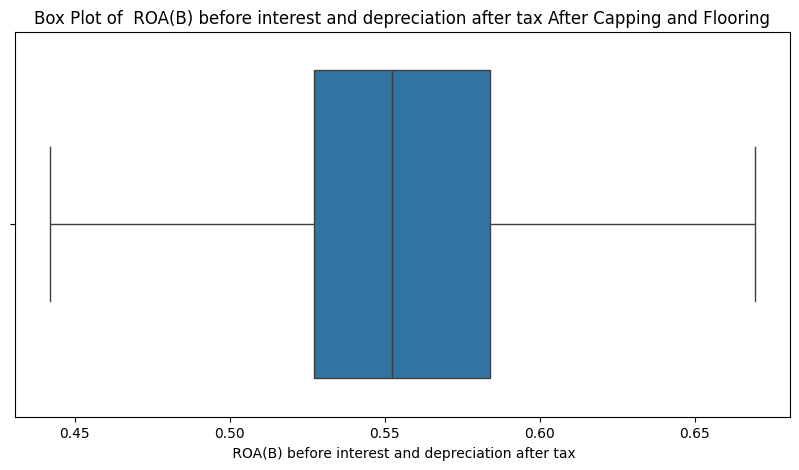

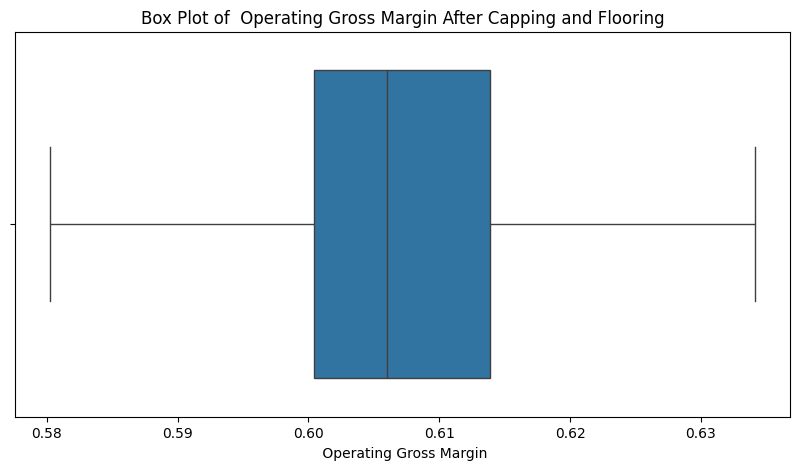

Number of outliers in each feature after capping and flooring:
 Bankrupt?                                                   220
 ROA(C) before interest and depreciation before interest      0
 ROA(A) before interest and % after tax                       0
 ROA(B) before interest and depreciation after tax            0
 Operating Gross Margin                                       0
                                                           ... 
 Liability to Equity                                          0
 Degree of Financial Leverage (DFL)                           0
 Interest Coverage Ratio (Interest expense to EBIT)           0
 Net Income Flag                                              0
 Equity to Liability                                          0
Length: 96, dtype: int64
         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                             

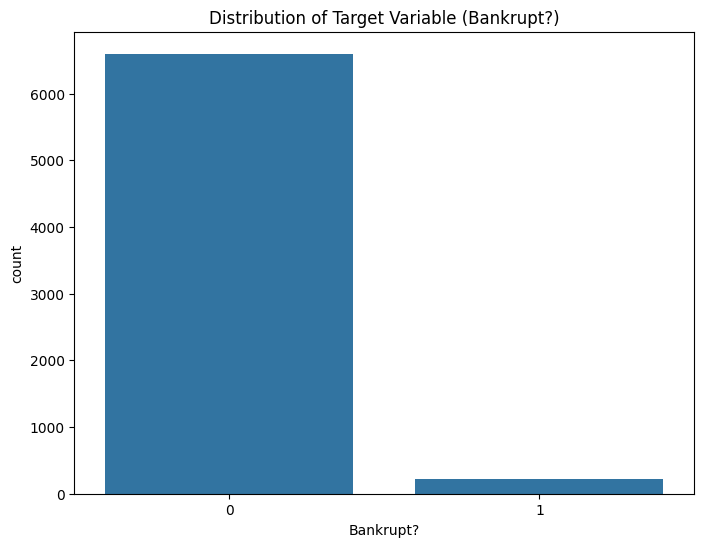

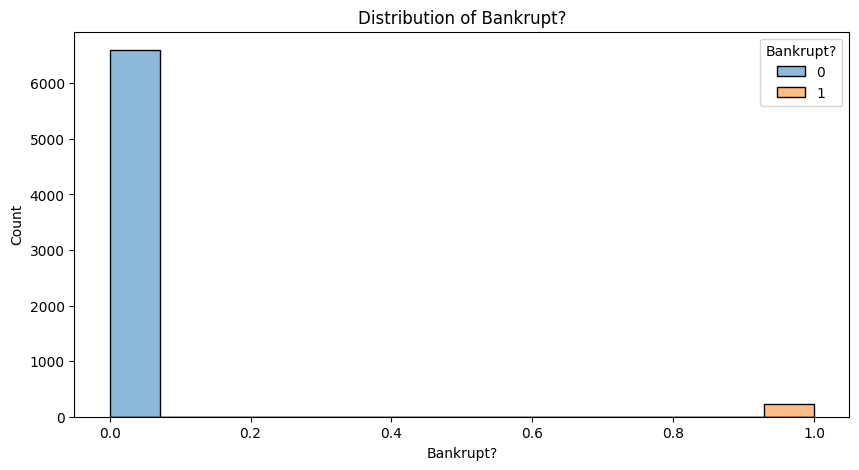

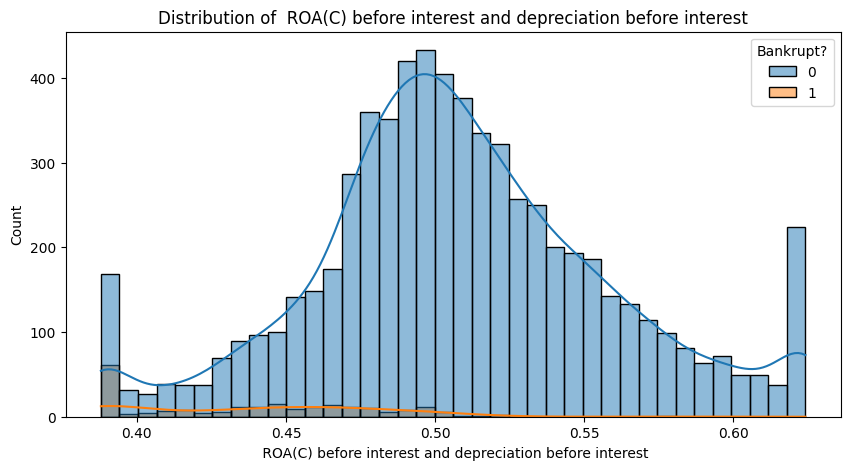

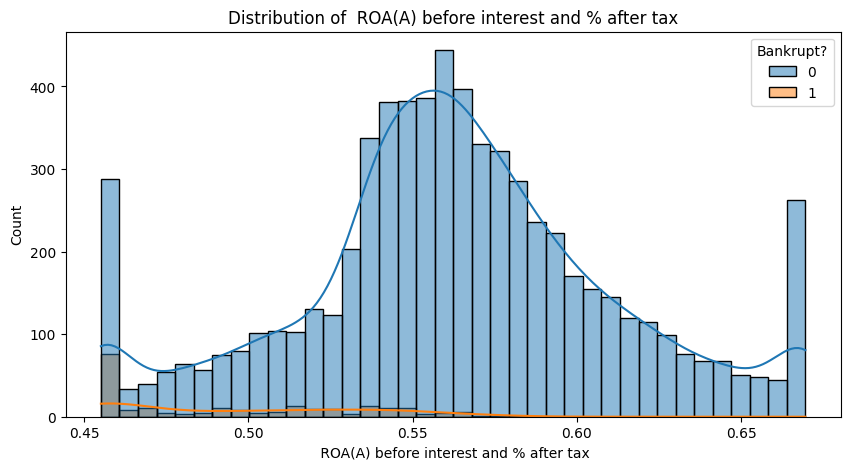

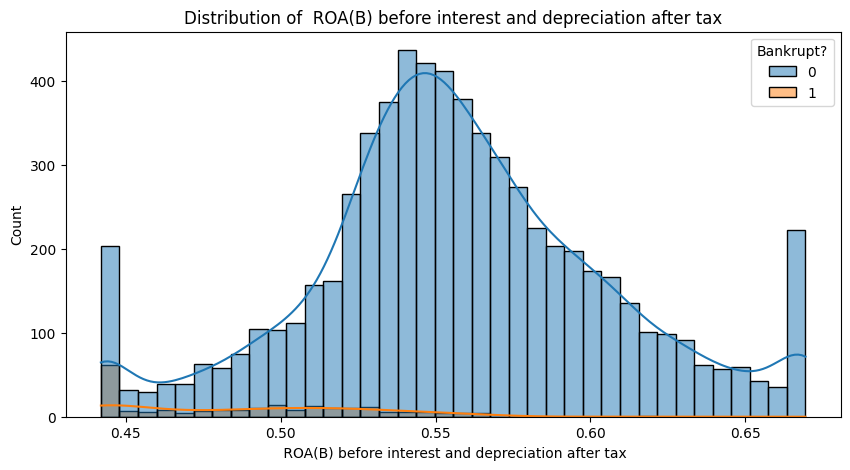

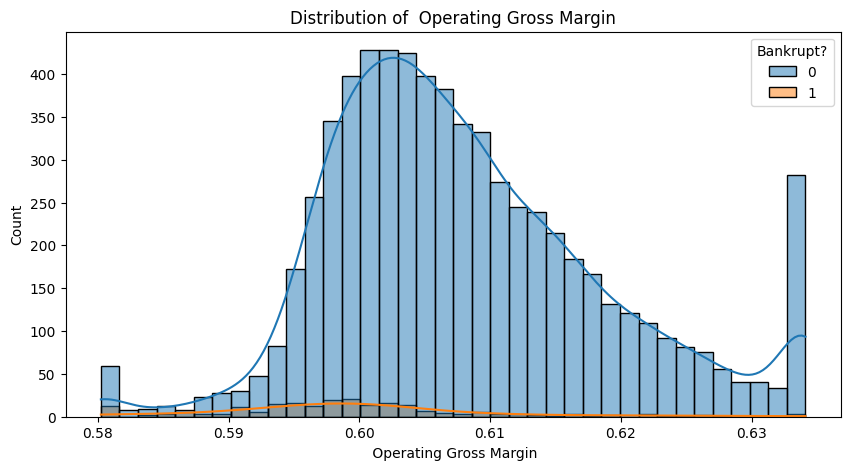

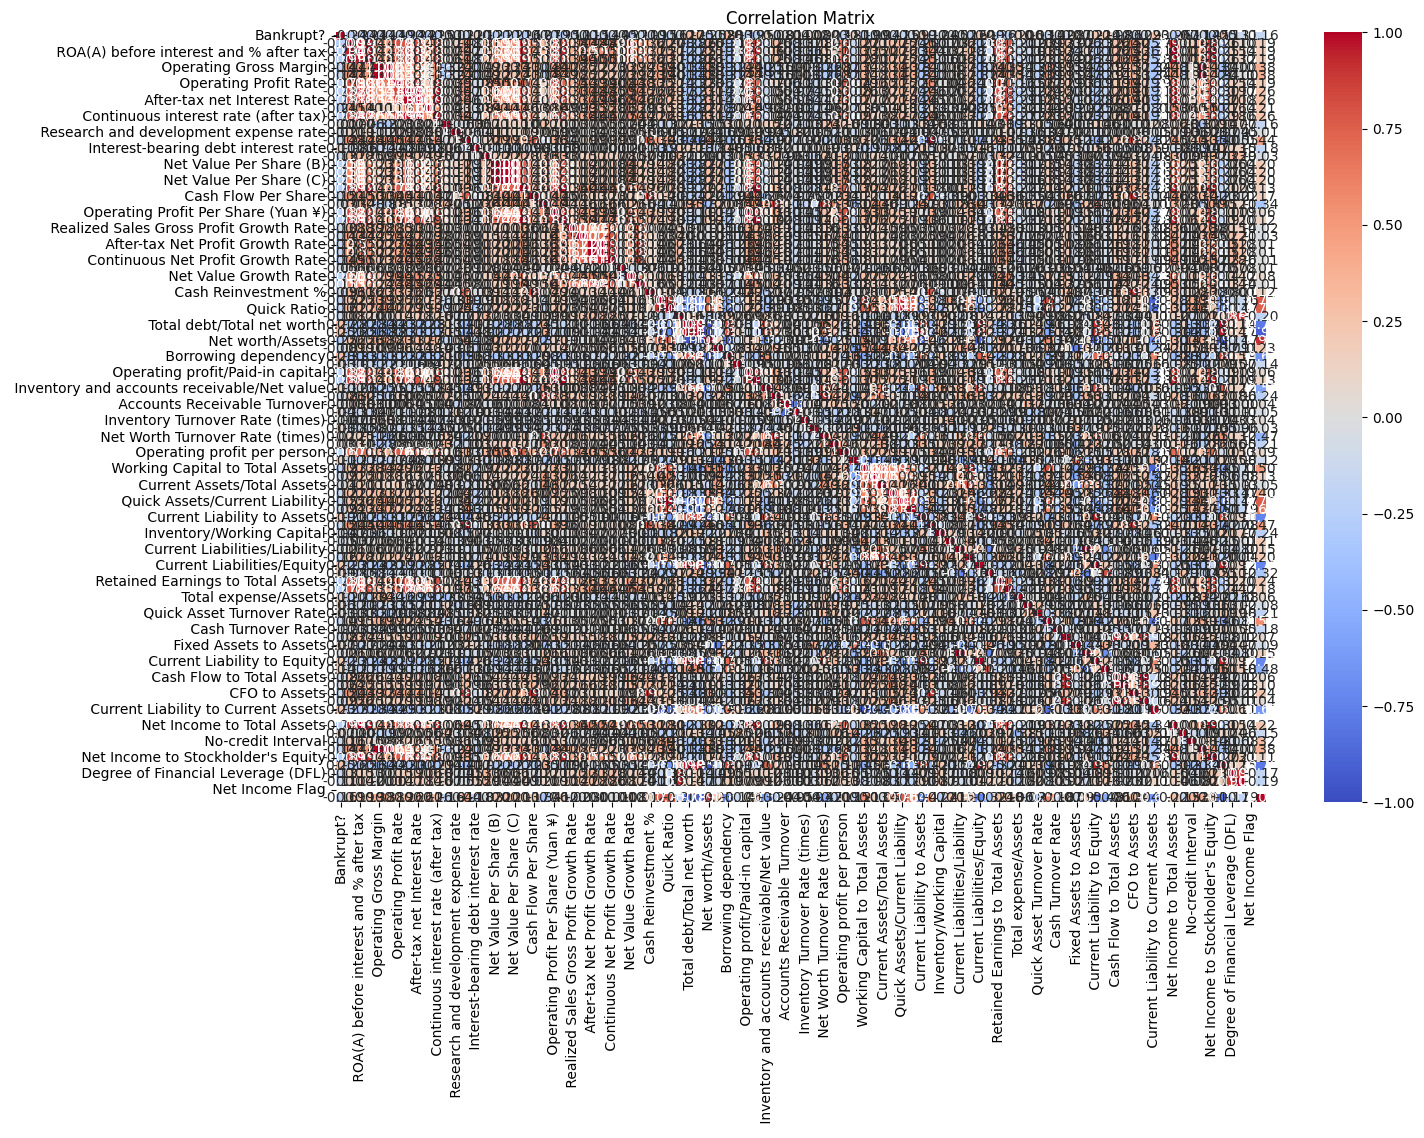

Bankrupt?                                   1.000000
 Borrowing dependency                       0.278367
 Total debt/Total net worth                 0.272914
 Debt ratio %                               0.246535
 Liability to Equity                        0.246176
                                              ...   
 Retained Earnings to Total Assets         -0.255218
 Net Income to Total Assets                -0.255797
 Persistent EPS in the Last Four Seasons   -0.256159
 Liability-Assets Flag                           NaN
 Net Income Flag                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Remove duplicate rows
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize outliers for a few selected features using box plots
selected_features = data.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Cap and floor outliers
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Bankrupt?':
        data[column] = np.where(data[column] > upper_bound[column], upper_bound[column], data[column])
        data[column] = np.where(data[column] < lower_bound[column], lower_bound[column], data[column])

# Verify that outliers have been capped and floored
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature} After Capping and Flooring')
    plt.show()

# Check for remaining outliers
outliers_after = ((data < lower_bound) | (data > upper_bound)).sum()
print("Number of outliers in each feature after capping and flooring:\n", outliers_after)

# Generate descriptive statistics
print(data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribution of Target Variable (Bankrupt?)')
plt.show()

# Visualize the distributions of a few selected features
selected_features = data.columns[:5]  # Replace with actual feature names or a subset of features
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=feature, hue='Bankrupt?', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with the target variable
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)
print(target_corr)


In [44]:
# Set benchmark for features correlation significance with target
corr_features = corr_matrix["Bankrupt?"].abs() >= 0.15
corr_features.value_counts()

Bankrupt?
False    58
True     38
Name: count, dtype: int64

In [45]:
# Get list of names for features passing the benchmark 
feature_names = list(corr_features[corr_features].index)
feature_names

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Net Value Growth Rate',
 ' Current Ratio',
 ' Quick Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Operating profit per person',
 ' Working Capital to Total Assets',
 ' Quick Assets/Current Liability',
 ' Current Liability to Assets',
 ' Working Capital/Equity',
 ' Current Liabi

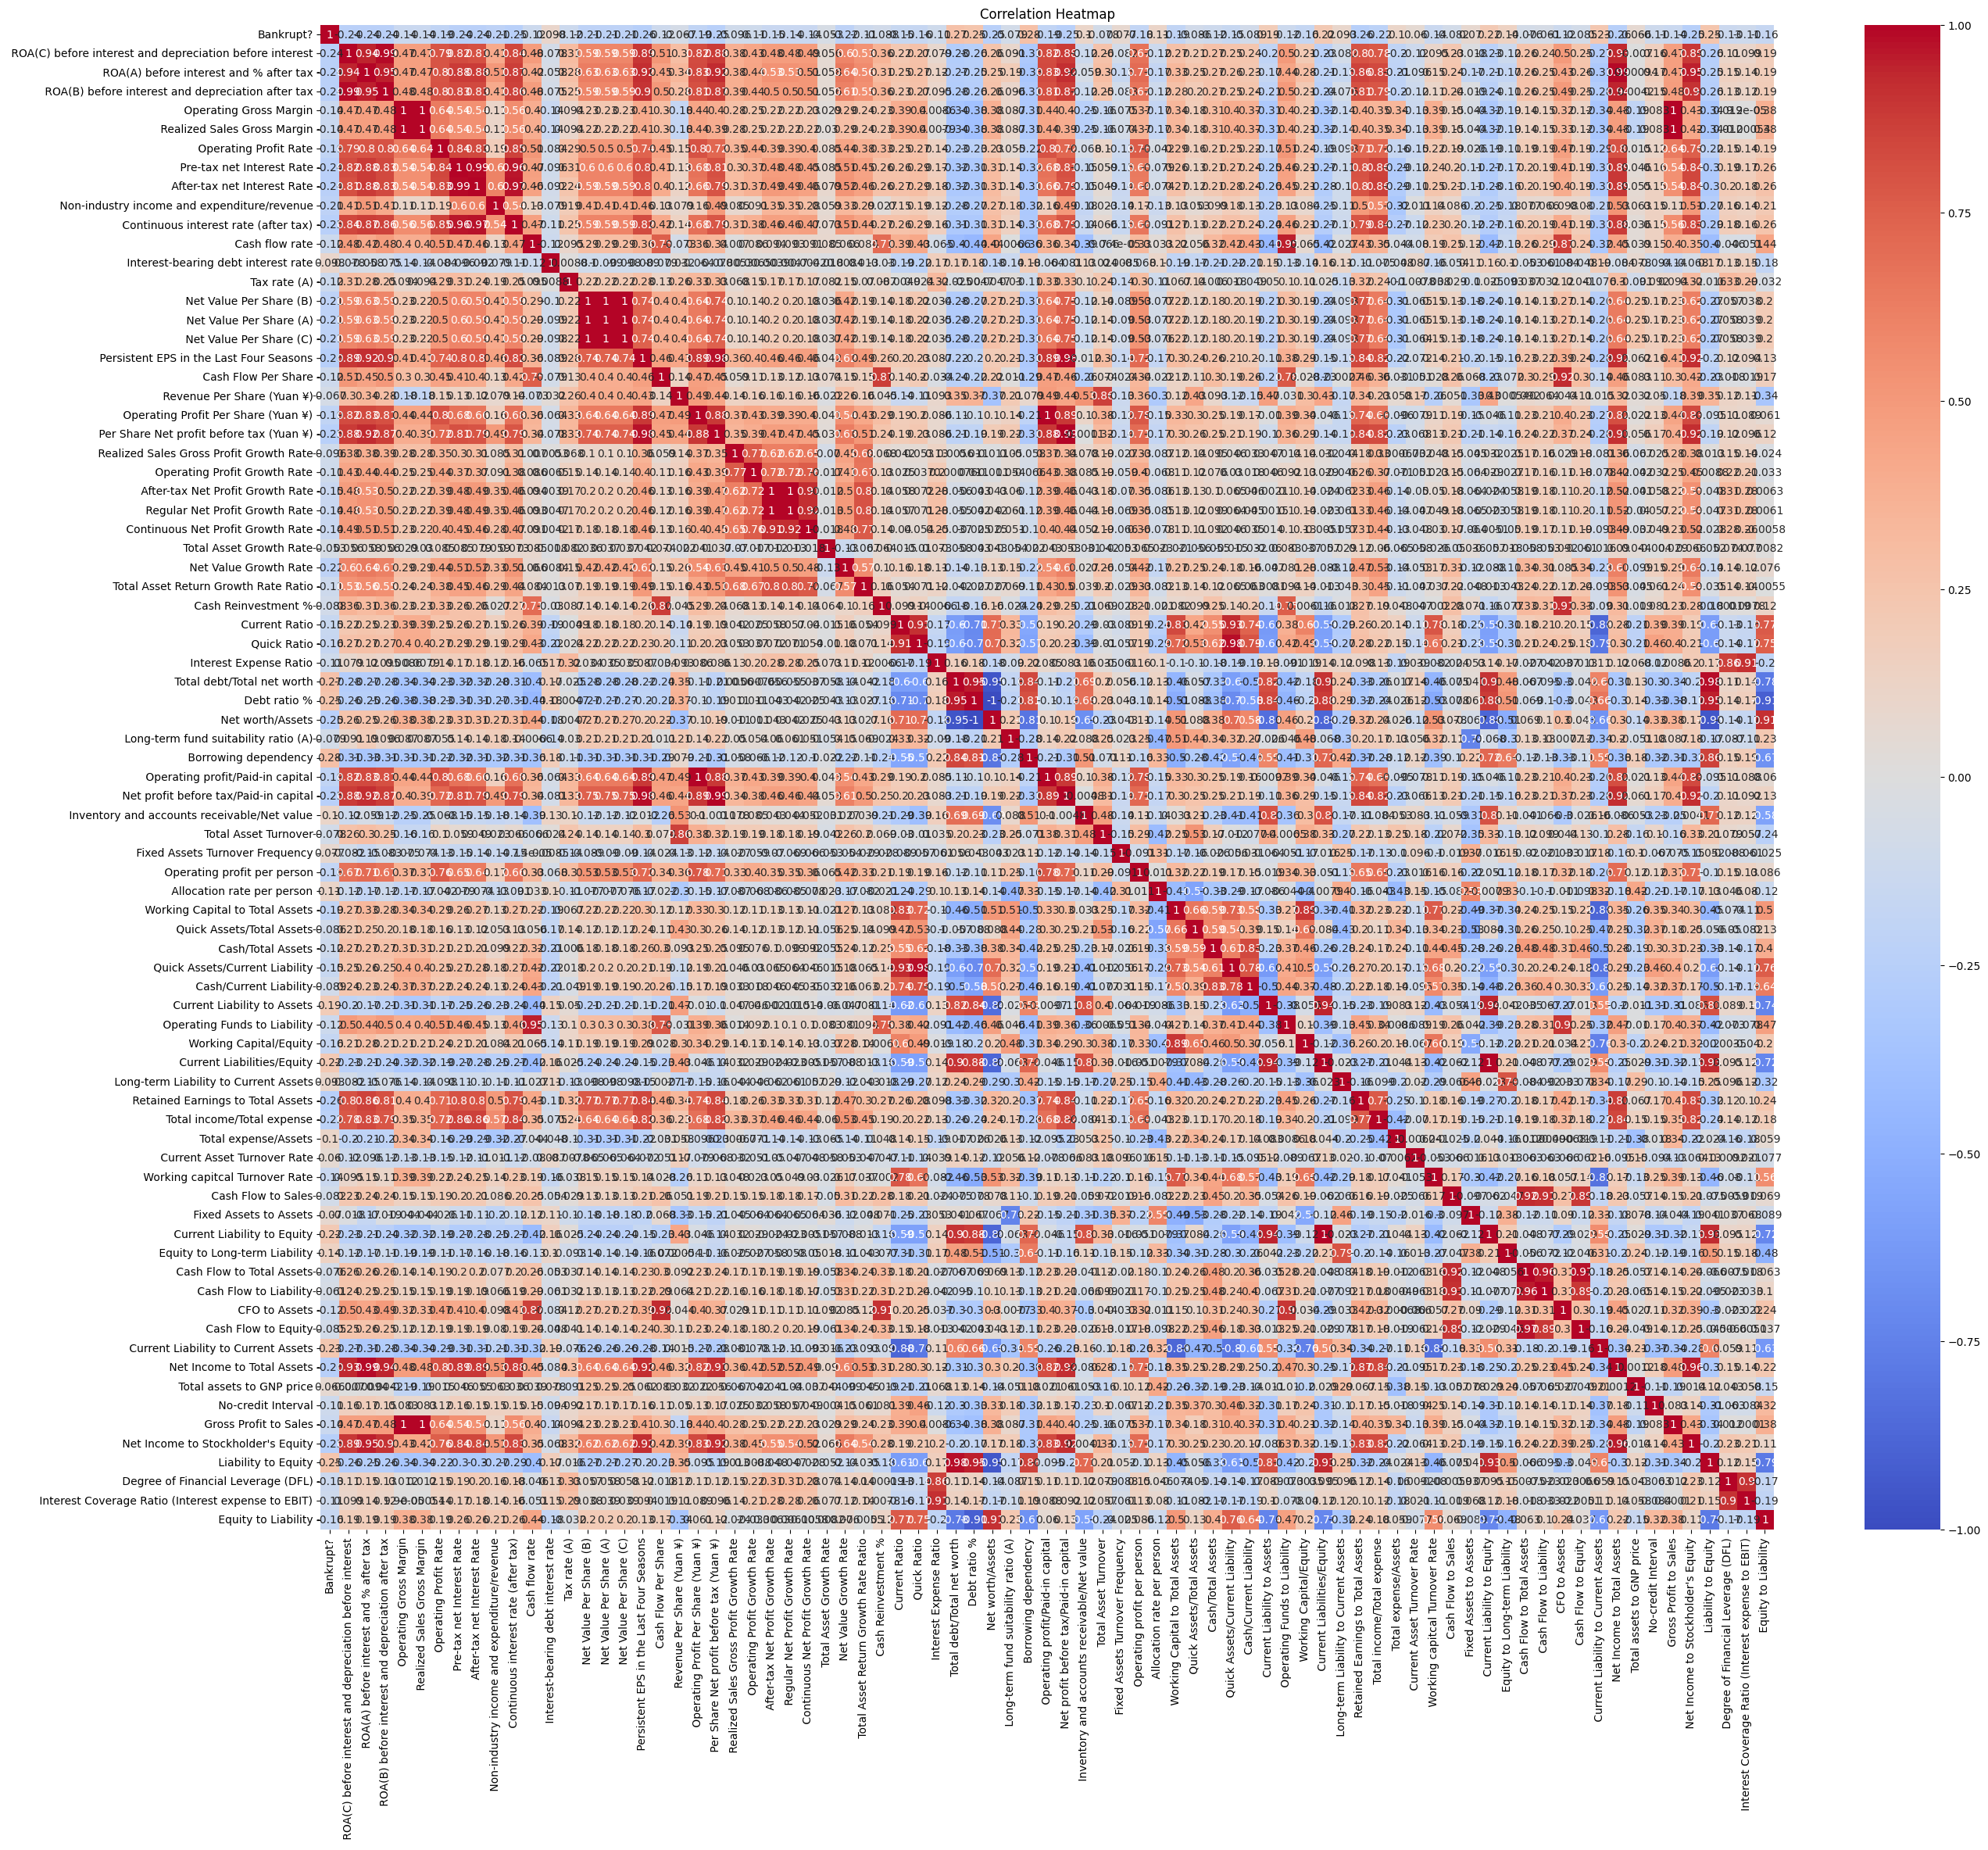

In [37]:
# Check corelations between selected features

# Create correlation matrix
mini_corr_matrix = data[feature_names].corr()

# Generate the heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(mini_corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Separate the data into bankrupt and non-bankrupt
bankrupt = data[data['Bankrupt?'] == 1]
non_bankrupt = data[data['Bankrupt?'] == 0]

# Perform t-tests
p_values = {}
for column in data.columns:
    if column != 'Bankrupt?':
        _, p_value = ttest_ind(bankrupt[column], non_bankrupt[column], equal_var=False)
        p_values[column] = p_value

# Select significant features
significant_features = [k for k, v in p_values.items() if v < 0.05]
print("Significant features:", significant_features)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(data[significant_features])
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(significant_features))

# Dimensionality reduction with PCA
pca = PCA(n_components=30)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_poly_df)

# Feature selection with RFE
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=30)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_pca, data['Bankrupt?'])

# Since we used PCA, the selected features correspond to the PCA components
# We will use the indices of the selected features from RFE directly
selected_pca_components = np.where(rfe.support_)[0]
print("Selected PCA components:", selected_pca_components)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_rfe, data['Bankrupt?'], test_size=0.2, random_state=42)

# Train logistic regression model
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Since we are using PCA components, interpreting coefficients directly might be less informative
# Instead, we focus on the selected PCA components
coefficients = pd.DataFrame({'PCA Component': selected_pca_components, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

# Summary of key insights and recommendations
# (You can write your insights and recommendations based on the analysis here)
# For example:
# - High impact PCA components: Component1, Component2, etc.
# - Recommendations for financial risk management.

C:\Users\divy0\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Significant features: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Ass

In [47]:
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[508 805]
 [ 19  32]]
